In [10]:
import pandas as pd
import numpy as np

x_train = pd.read_csv('Dataset/x_train_all.csv')  

summary_stats = x_train.describe()
summary_stats

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


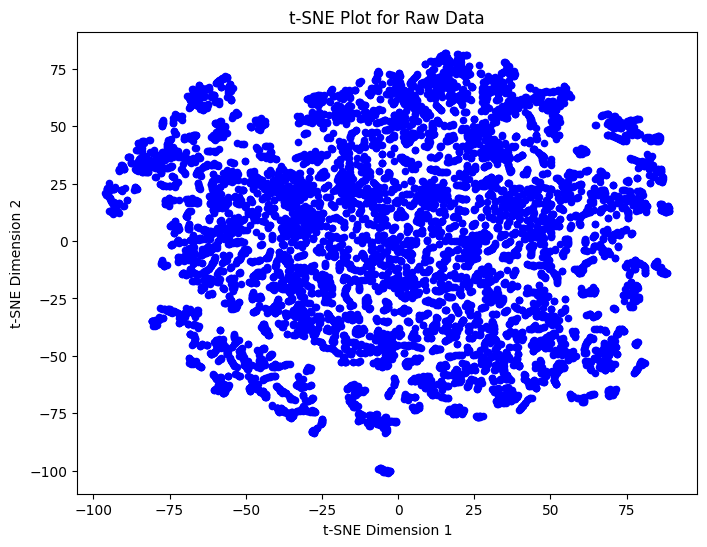

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

raw_data = x_train.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(raw_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [11]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

p_df = pd.read_csv('processed_df2.csv')
p_df.shape

(9690, 2304)

In [12]:
def grayscale_to_infrared(grayscale_image):
    row = np.array(grayscale_image, dtype=np.uint8)
    color_map = plt.get_cmap('hot')
    normalized_image = row / 255.0
    infrared_image = (color_map(normalized_image)[:, :, 0] * 255).astype(np.uint8)
    return infrared_image.flatten()

In [13]:
infrared_original = []

for i, idx in enumerate(x_train.index):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_org = pd.DataFrame(infrared_original)
infrared_df_org.shape

(9690, 2304)

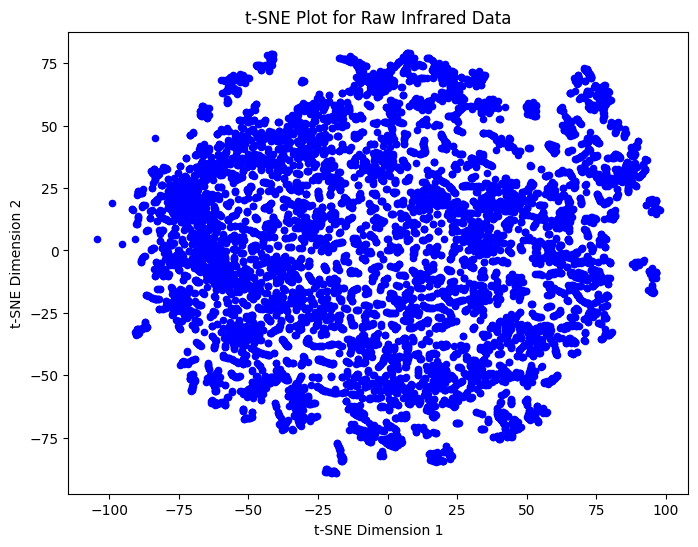

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


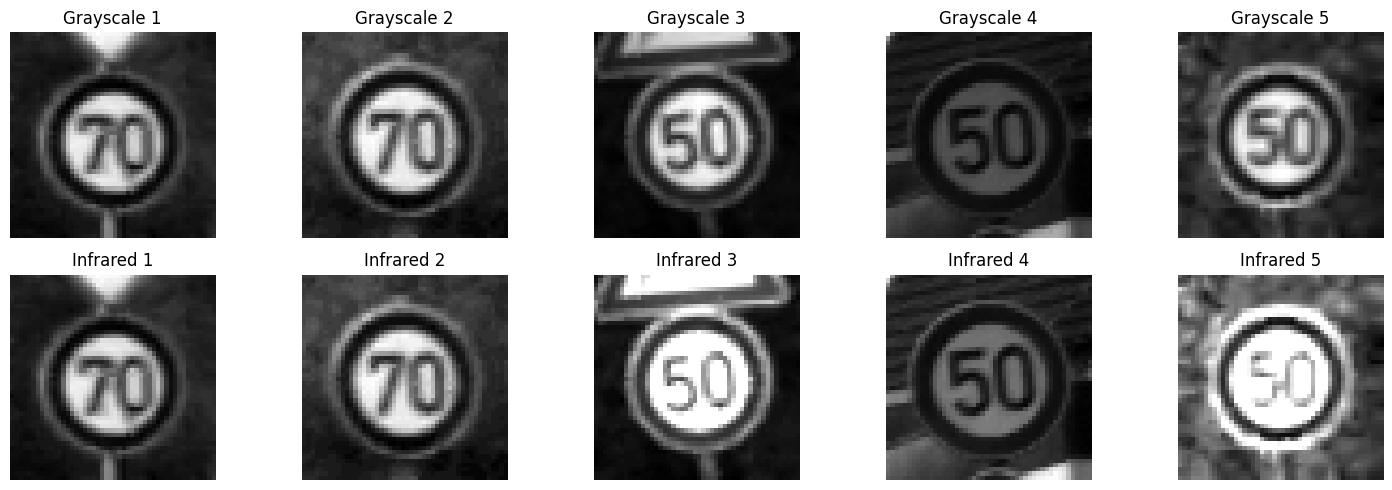

In [15]:
sample_size = 5
sample_indices = np.random.choice(range(len(infrared_df_org)), sample_size, replace=False)

x_train_reset = infrared_df_org.reset_index(drop=True)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(sample_indices):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    processed_image = x_train_reset.iloc[idx].values.reshape(48, 48)

    plt.subplot(2, sample_size, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Grayscale {i+1}')
    plt.axis('off')

    plt.subplot(2, sample_size, sample_size + i + 1)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f'Infrared {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
from sklearn.cluster import KMeans

def kmeansfunc(data, k):
    kmeans = KMeans(n_clusters=k, random_state=19)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    print("Inertia: ", kmeans.inertia_)
    return clusters

In [17]:
from sklearn.metrics import silhouette_score

def silhouetteScore(data,clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    print("Silhouette Score:", silhouette_avg)

In [18]:
clusters = kmeansfunc(infrared_df_org, 10)
silhouetteScore(infrared_df_org,clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  42586399938.51187


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.13481848683347666


In [19]:
from sklearn.ensemble import IsolationForest

feature_names = [f'feature_{str(col)}' for col in x_train.columns]
infrared_copy = x_train.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_no_outliers = infrared_copy.drop(outlier_indices)
infra_no_outliers.to_csv('x_train_no_outliers.csv',index=False)

outlier_indices_df = pd.DataFrame({'outlier_index': outlier_indices})

outlier_indices_df.to_csv('outlier_indices.csv', index=False)

In [20]:
clusters = kmeansfunc(infra_no_outliers, 10)
silhouetteScore(infra_no_outliers,clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  36507130738.34281


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.14197652594783366


In [21]:
mean=infra_no_outliers.mean()
std=infra_no_outliers.std()
infra_norm=(infra_no_outliers-mean)/std

In [22]:
clusters = kmeansfunc(infra_norm, 10)
silhouetteScore(infra_norm,clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  8628579.582745984


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.1368738510055143


In [23]:
mean=x_train.mean()
std=x_train.std()
x_norm=(x_train-mean)/std

In [24]:
infrared_original = []

for i, idx in enumerate(x_norm.index):
    original_image = x_norm.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_norm = pd.DataFrame(infrared_original)
infrared_df_norm.shape

(9690, 2304)

In [25]:
clusters = kmeansfunc(infrared_df_norm, 10)
silhouetteScore(infrared_df_norm,clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  28916431035.709877


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5046952615364717


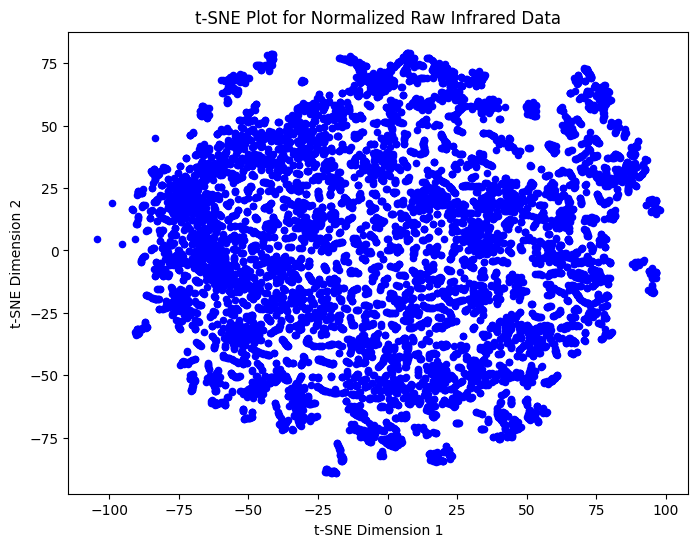

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Normalized Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [27]:
from sklearn.ensemble import IsolationForest

feature_names = [f'feature_{str(col)}' for col in infrared_df_norm.columns]
infrared_copy = infrared_df_norm.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_norm_no_outliers = infrared_copy.drop(outlier_indices)

In [28]:
clusters = kmeansfunc(infra_norm_no_outliers, 10)
silhouetteScore(infra_norm_no_outliers,clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  27467387926.813747


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5016481867119463


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

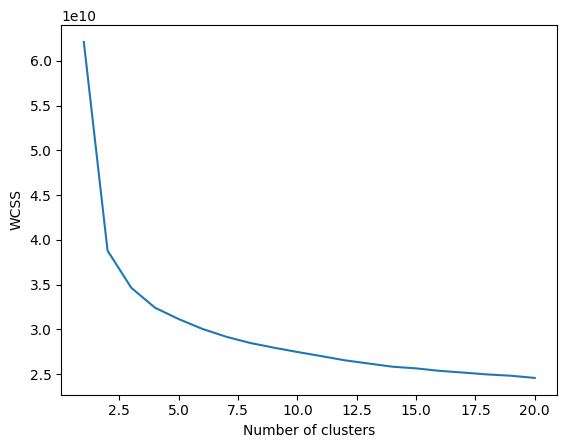

In [29]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 21): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19)
    kmeans.fit(infra_norm_no_outliers) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [30]:
clusters = kmeansfunc(infra_norm_no_outliers, 2)
silhouetteScore(infra_norm_no_outliers,clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  38799395156.324585


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.6776758908035815


In [31]:
def apply_gaussian_blur(row, kernel_size=(5, 5), sigma=0):
    row = np.array(row, dtype=np.uint8)
    row = cv2.GaussianBlur(row, kernel_size, sigma)
    return row

def apply_clahe(row):
    row = np.array(row, dtype=np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_row = clahe.apply(row)
    return equalized_row

In [32]:
infrared_prep = []

for index, row in infra_norm_no_outliers.iterrows():
    image_data = row.values
    gaussian_image = apply_gaussian_blur(image_data)
    equalized_image = apply_clahe(gaussian_image)
    infrared_prep.append(equalized_image.flatten())

prepped_infrared_df = pd.DataFrame(infrared_prep)
prepped_infrared_df.shape

(9593, 2304)

In [33]:
infra_norm_no_outliers.shape

(9593, 2304)

In [34]:
def kmeansfunc_iter(data, k, seed):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    print(clusters)
    return clusters

def silhouetteScore_iter(data,clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    return silhouette_avg

In [ ]:
seed_value = 0
max_score = 0
best_seed = 0

while seed_value<101:
    clusters = kmeansfunc_iter(prepped_infrared_df, 10, seed_value)
    cur_score = silhouetteScore_iter(prepped_infrared_df, clusters)
    if cur_score > max_score:
        best_seed = seed_value
        max_score = cur_score
    seed_value = seed_value + 1

In [ ]:
print(best_seed)
max_score

19


0.5041986688186679

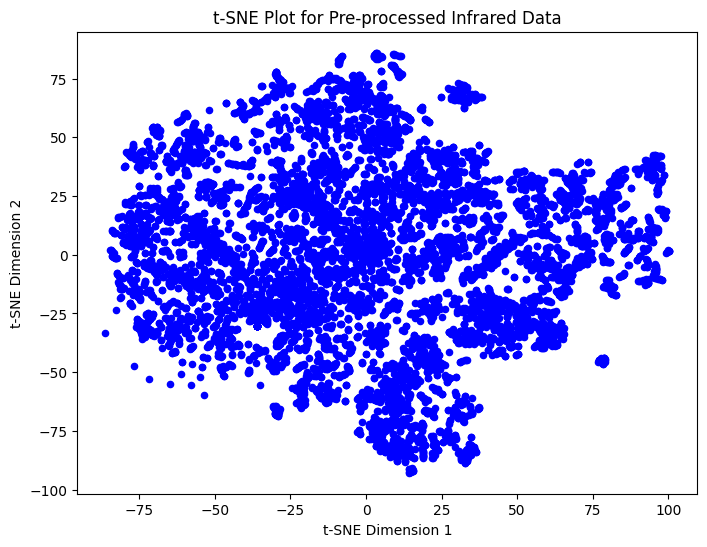

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [43]:
clusters = kmeansfunc(prepped_infrared_df, 10)
silhouetteScore(prepped_infrared_df,clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  16758303468.03527


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5041986688186679


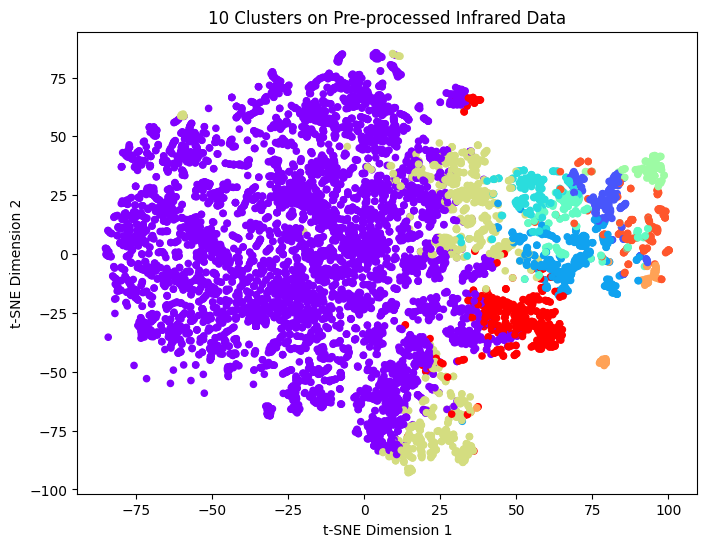

In [45]:
infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [46]:
clusters = kmeansfunc(prepped_infrared_df, 2)
silhouetteScore(prepped_infrared_df,clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  26778047697.812164


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.7033537860848569


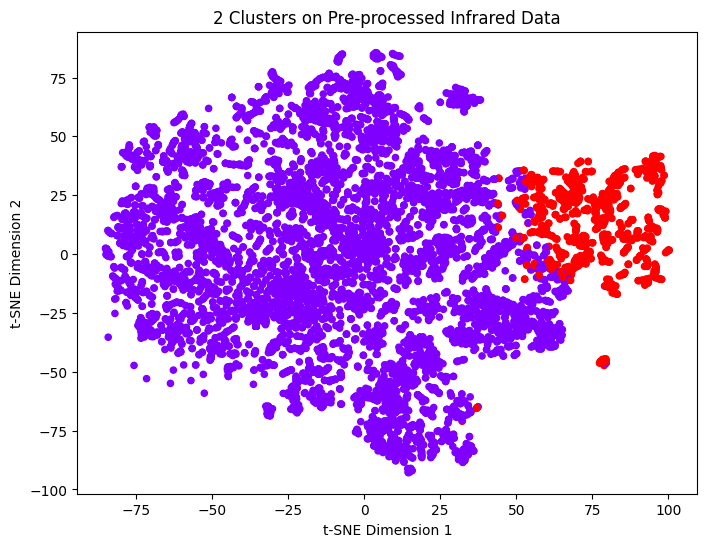

In [47]:
infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()